# Sentiment Analysis


## Task1

In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import pandas as pd
import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
import nltk
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [2]:
def scrap_tweets(since,until):
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch('#CoronaVirus')\
                     .setSince(since)\
                     .setUntil(until)\
                     .setMaxTweets(300)
    
    tweet=got.manager.TweetManager.getTweets(tweetCriteria)
    
    tweet_text=[[tweet.text]for tweet in tweet]
    return tweet_text


# Before coronavirus outbreak
text_tweets_before=scrap_tweets("2020-01-01","2020-01-30")

# After coronavirus outbreak
text_tweets_after=scrap_tweets("2020-03-01","2020-04-01")

length=len(text_tweets_before)
text_before = ""
text_after = ""
for i in range(0,length):
    text_before=text_tweets_before[i][0]+ " " + text_before
    text_after=text_tweets_after[i][0]+ " " + text_after

# Convert to lowercase 
lower_case_before = text_before.lower()
lower_case_after = text_after.lower()

# Remove punctuation characters
cleaned_text_before=lower_case_before.translate(str.maketrans('','',string.punctuation))
cleaned_text_after=lower_case_after.translate(str.maketrans('','',string.punctuation))

# Split text into words
tokenized_words_before=cleaned_text_before.split()
tokenized_words_after=cleaned_text_after.split()

In [3]:
cleaned_text_before

'vespa quanti morti fece la sars grande esperto iss ehh guardisì behhhla sars fece centinaia di morti 400 furono più di 800 grazie robersperanza dormiamo sonni tranquilli con questa task force portaaporta coronavirus sinon la grippe a tué 13’000 personnes en france pendant l’hiver 20172018 et vous vous tomber dans la panique totale alors qu’on a déjà tout les virus qu’il faut pour crever  tellement influençable  coronavirus it is reckless to use body temp to allow people to travel incubation period is 10daysyoure literally releasing it into societysending human time bombs out as the vector to spread the virus when they become symptomatic its ignorant virus coronavirus china coronavirus i hope who will do their due diligence and check the of deaths from pneumonia and respiratory diseases before the story broke you owe it to the people of wuhan and their families who couldnt get medical attention or even testing coronavirus what we know so far today from new england journal of medicine n

In [4]:
tokenized_words_before

['vespa',
 'quanti',
 'morti',
 'fece',
 'la',
 'sars',
 'grande',
 'esperto',
 'iss',
 'ehh',
 'guardisì',
 'behhhla',
 'sars',
 'fece',
 'centinaia',
 'di',
 'morti',
 '400',
 'furono',
 'più',
 'di',
 '800',
 'grazie',
 'robersperanza',
 'dormiamo',
 'sonni',
 'tranquilli',
 'con',
 'questa',
 'task',
 'force',
 'portaaporta',
 'coronavirus',
 'sinon',
 'la',
 'grippe',
 'a',
 'tué',
 '13’000',
 'personnes',
 'en',
 'france',
 'pendant',
 'l’hiver',
 '20172018',
 'et',
 'vous',
 'vous',
 'tomber',
 'dans',
 'la',
 'panique',
 'totale',
 'alors',
 'qu’on',
 'a',
 'déjà',
 'tout',
 'les',
 'virus',
 'qu’il',
 'faut',
 'pour',
 'crever',
 'tellement',
 'influençable',
 'coronavirus',
 'it',
 'is',
 'reckless',
 'to',
 'use',
 'body',
 'temp',
 'to',
 'allow',
 'people',
 'to',
 'travel',
 'incubation',
 'period',
 'is',
 '10daysyoure',
 'literally',
 'releasing',
 'it',
 'into',
 'societysending',
 'human',
 'time',
 'bombs',
 'out',
 'as',
 'the',
 'vector',
 'to',
 'spread',
 'the',


In [5]:
cleaned_text_after

'“de 11 hasta más de 180000″ cómo eeuu se convirtió en el nuevo epicentro mundial de la pandemia de coronavirus  the coronavirus crisis could be as bad as anything we’ve seen in the last 150 yrs harvard university economist kennethrogoff knows what a financial crisis looks like he studied 800 yrs of crises with fellow economist carmen…httpslnkdingxukydu  funny tweet soooo believable thanks covid19 coronavirus covid stayathome trumpvirus trump2020 trumpplague maga trumpliesamericansdie covidiot coronavirustruth coronavirususa grim models project high usa toll in covid19 crisis president trump warned of “a very very painful two weeks” medical experts predicted between 100000 to 240 000 american deaths from coronavirus 22 million would dieif nothing is done  coronavirus no equador  coronavirus video irresponsable comentario de un intendente pueden morir 5000 personas  por adanielagian covidー19 coronavirus quedateentucasa fase2 renunciaamlo conlosninosno quedateencasa fase2 cuarentenaporla

In [6]:
len(tokenized_words_after)

6868

In [7]:
cleaned_text_after

'“de 11 hasta más de 180000″ cómo eeuu se convirtió en el nuevo epicentro mundial de la pandemia de coronavirus  the coronavirus crisis could be as bad as anything we’ve seen in the last 150 yrs harvard university economist kennethrogoff knows what a financial crisis looks like he studied 800 yrs of crises with fellow economist carmen…httpslnkdingxukydu  funny tweet soooo believable thanks covid19 coronavirus covid stayathome trumpvirus trump2020 trumpplague maga trumpliesamericansdie covidiot coronavirustruth coronavirususa grim models project high usa toll in covid19 crisis president trump warned of “a very very painful two weeks” medical experts predicted between 100000 to 240 000 american deaths from coronavirus 22 million would dieif nothing is done  coronavirus no equador  coronavirus video irresponsable comentario de un intendente pueden morir 5000 personas  por adanielagian covidー19 coronavirus quedateentucasa fase2 renunciaamlo conlosninosno quedateencasa fase2 cuarentenaporla

In [8]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","also",'i', 'me', 'my', 'myself', 
              'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
              'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
              'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
              "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
              'should','now'
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
              'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll',
              'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
              "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
              "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","would","could","mr","ms"]

# Removing stop words from the tokenized words list
final_words_before = [word for word in tokenized_words_before if word not in stop_words]
# Removing stop words from the tokenized words list
final_words_after = [word for word in tokenized_words_after if word not in stop_words]

# Lemmatization - From plural to single + Base form of a word (example better-> good)
#nltk.download('wordnet')
lemma_words_before = []
lemma_words_after = []
final_words=[final_words_before,final_words_after]
for i in final_words:
    for word in i:
        word = WordNetLemmatizer().lemmatize(word)
        if i==final_words_before:
            lemma_words_before.append(word)
        if i==final_words_after:
            lemma_words_after.append(word)

In [9]:
lemma_words_before

['vespa',
 'quanti',
 'morti',
 'fece',
 'la',
 'sars',
 'grande',
 'esperto',
 'i',
 'ehh',
 'guardisì',
 'behhhla',
 'sars',
 'fece',
 'centinaia',
 'di',
 'morti',
 '400',
 'furono',
 'più',
 'di',
 '800',
 'grazie',
 'robersperanza',
 'dormiamo',
 'sonni',
 'tranquilli',
 'con',
 'questa',
 'task',
 'force',
 'portaaporta',
 'coronavirus',
 'sinon',
 'la',
 'grippe',
 'tué',
 '13’000',
 'personnes',
 'en',
 'france',
 'pendant',
 'l’hiver',
 '20172018',
 'et',
 'vous',
 'vous',
 'tomber',
 'dans',
 'la',
 'panique',
 'totale',
 'alors',
 'qu’on',
 'déjà',
 'tout',
 'le',
 'virus',
 'qu’il',
 'faut',
 'pour',
 'crever',
 'tellement',
 'influençable',
 'coronavirus',
 'reckless',
 'use',
 'body',
 'temp',
 'allow',
 'people',
 'travel',
 'incubation',
 'period',
 '10daysyoure',
 'literally',
 'releasing',
 'societysending',
 'human',
 'time',
 'bomb',
 'vector',
 'spread',
 'virus',
 'become',
 'symptomatic',
 'ignorant',
 'virus',
 'coronavirus',
 'china',
 'coronavirus',
 'hope',
 

In [10]:
lemma_words_after

['“de',
 '11',
 'hasta',
 'más',
 'de',
 '180000″',
 'cómo',
 'eeuu',
 'se',
 'convirtió',
 'en',
 'el',
 'nuevo',
 'epicentro',
 'mundial',
 'de',
 'la',
 'pandemia',
 'de',
 'coronavirus',
 'coronavirus',
 'crisis',
 'bad',
 'anything',
 'we’ve',
 'seen',
 'last',
 '150',
 'yr',
 'harvard',
 'university',
 'economist',
 'kennethrogoff',
 'know',
 'financial',
 'crisis',
 'look',
 'like',
 'studied',
 '800',
 'yr',
 'crisis',
 'fellow',
 'economist',
 'carmen…httpslnkdingxukydu',
 'funny',
 'tweet',
 'soooo',
 'believable',
 'thanks',
 'covid19',
 'coronavirus',
 'covid',
 'stayathome',
 'trumpvirus',
 'trump2020',
 'trumpplague',
 'maga',
 'trumpliesamericansdie',
 'covidiot',
 'coronavirustruth',
 'coronavirususa',
 'grim',
 'model',
 'project',
 'high',
 'usa',
 'toll',
 'covid19',
 'crisis',
 'president',
 'trump',
 'warned',
 '“a',
 'painful',
 'two',
 'weeks”',
 'medical',
 'expert',
 'predicted',
 '100000',
 '240',
 '000',
 'american',
 'death',
 'coronavirus',
 '22',
 'million

## Task 2

People emotions before the outbreak 
 [' safe', ' average', ' attracted', ' surprise', ' powerless', ' hated', ' fearful', ' free', ' happy', ' happy', ' sad', ' attracted', ' fearful', ' powerless', ' alone', ' free', ' sad', ' surprise', ' esteemed', ' anxious', ' fearful', ' entitled', ' attached', ' fearful', ' alone', ' embarrassed', ' average', ' angry', ' happy', ' sad', ' hated', ' fearful', ' entitled'] 
 

People emotions after the outbreak 
 [' attracted', ' powerless', ' sad', ' fearful', ' surprise', ' attached', ' attracted', ' fearful', ' free', ' singled out', ' fearful', ' entitled', ' happy', ' lost', ' adequate', ' happy', ' fearful', ' esteemed', ' independent', ' fearful', ' powerless', ' powerless', ' fearful', ' fearful', ' alone', ' happy'] 
 

Count of each emotion before outbreak 
 Counter({' fearful': 5, ' happy': 3, ' sad': 3, ' average': 2, ' attracted': 2, ' surprise': 2, ' powerless': 2, ' hated': 2, ' free': 2, ' alone': 2, ' entitled': 2, ' safe': 1, ' 

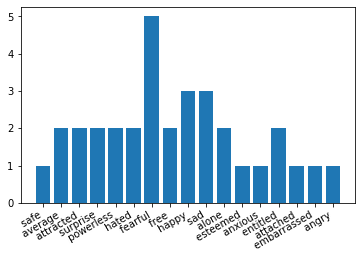

************************************************************************************************************************

     ******Negative Sentiment*******
{'neg': 0.092, 'neu': 0.821, 'pos': 0.087, 'compound': -0.9949}


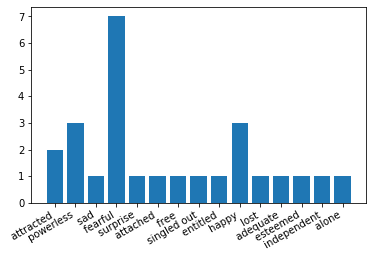

In [11]:
emotion_before = []
emotion_after = []
lemma_words=[lemma_words_before,lemma_words_after]
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        for i in lemma_words:
            if word in i:
                if i==lemma_words[0]:
                    emotion_before.append(emotion)
                if i==lemma_words[1]:
                    emotion_after.append(emotion)
            
print("People emotions before the outbreak \n", emotion_before, '\n \n')
print("People emotions after the outbreak \n", emotion_after, '\n \n')

count_before = Counter(emotion_before)
count_after = Counter(emotion_after)

print("Count of each emotion before outbreak \n", count_before,'\n \n')
print("Count of each emotion after outbreak \n", count_after)

# lets define the function to check the Negative and Positive sentiment
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")
print("\n")      
print("*"*120)
print("\n")      
print("Graphical representation of Sentiment Analyzer")
print("\n")      
print("*"*120)  
# Calling sentiment_analyse function
sentiment_analyse(cleaned_text_before)
# Test how SentimentIntensityAnalyzer works
print(SentimentIntensityAnalyzer().polarity_scores(cleaned_text_before))
fig, ax1 = plt.subplots()
ax1.bar(count_before.keys(), count_before.values())
fig.autofmt_xdate()
plt.savefig('graph_before.png')
plt.show()
print("*"*120)

sentiment_analyse(cleaned_text_after)
print(SentimentIntensityAnalyzer().polarity_scores(cleaned_text_after))
fig, ax1 = plt.subplots()
ax1.bar(count_after.keys(), count_after.values())
fig.autofmt_xdate()
plt.savefig('graph_after.png')
plt.show()

## People sentiments before and after the outbreak are negative but after the coronavirus outbreak people fears a more..

## Task 3

In [12]:
document1=[cleaned_text_before]
document2=[cleaned_text_after]

cv=CountVectorizer()
for i,j in enumerate([document1,document2]):
    cv.fit_transform(j)
    if i==0:
        k='before'
        print(f"Bag of Words {k} Outbreak:\n",cv.get_feature_names())
        print("*" * 100)
        print(f"Original Indices {k} Outbreak:\n",cv.vocabulary_)
        print("*" * 100)

    else:
        k='after'
        print("*" * 100)
        print(f"Bag of Words {k} Outbreak:\n",cv.get_feature_names())
        print("*" * 100)
        print(f"Original Indices {k} Outbreak:\n",cv.vocabulary_)
    
    
    

    

Bag of Words before Outbreak:
 ['000', '01252020', '08101', '10', '100', '1000', '1032', '106', '10daysyoure', '12', '12167', '122', '1220', '124', '129', '13', '132', '14', '1439', '15', '155', '1589', '162', '164', '169', '170', '1700', '1737', '195', '19h30', '20', '200', '20022003', '2012', '2015', '20172018', '2018', '2019', '2019ncov', '2020', '2020年1月29日湖北省新型冠状病毒感染的肺炎疫情情况', '21', '210', '219', '22', '24', '24hrs', '2563', '29', '290120', '29ene', '2s', '30', '30010050', '30012020', '3012', '30th', '31', '34', '37', '3gg', '40', '400', '4000', '4170', '425', '4334', '4586', '4m', '4pm', '50', '5000', '52', '5327', '536', '59', '5900', '5974', '6000', '60000', '6061', '70', '700', '705', '7087', '7096', '711', '7186', '7201', '7202', '7206', '7209', '7251', '7256', '7260', '767300er', '7700', '7711', '7736', '80', '800', '81000', '8pmet', '8worldnews', '8视界新闻', '90', '9239', '95ci', '96', 'a350', 'aantal', 'aarsmancollectie', 'ab', 'able', 'aboard', 'about', 'above', 'abreast', 'a

****************************************************************************************************
Bag of Words after Outbreak:
 ['000', '01', '0104', '10000', '100000', '100000240000', '101', '1010', '1054', '11', '116', '12', '13', '14', '1420', '143090', '15', '150', '1500', '1592', '16', '163000', '16º', '17', '177782', '18', '180000', '188172', '19', '1970', '1987', '1989', '1990', '1992', '1abril', '1m', '1st', '20', '20000', '2007', '200k', '2010', '2020', '2020029', '2022', '20mil', '22', '23', '240', '240000', '25', '2620', '27', '270', '2757', '28', '2836', '2independent', '2k', '30', '30daystoslowthespread', '31', '311', '31mar', '32', '320', '321', '331', '33120', '338', '3873', '394', '40', '4050', '4053', '41495', '42044', '480000', '50', '5000', '52', '525', '5pm', '600', '6092927272', '63', '70', '7024', '71', '74m', '7th', '80', '800', '835k', '837', '84', '8527', '854912', '88', '89', '95', '99', '9am', 'abandonados', 'abandons', 'abbotts', 'abençoado', 'abençoe', '

In [13]:
index=['bow_tweets_before','bow_tweets_after']
document=[cleaned_text_before,cleaned_text_after]
array_doc = cv.fit_transform(document)
df=pd.DataFrame(array_doc.toarray(),columns=cv.get_feature_names(),index=index)
df

,000,01,0104,01252020,08101,10,100,1000,10000,100000,...,成田空港,新型コロナウイルス,新型肺炎,武汉肺炎疫情最新发展,武漢肺炎,死亡病例也增加到170起,湖北省卫生健康委员会,目前已突破7000起,羽田空港,讨论中国武汉肺炎疫情是否构成国际关注公共卫生紧急事件
bow_tweets_before,1,0,0,1,1,2,2,2,0,0,...,0,1,0,2,0,1,1,1,0,1
bow_tweets_after,2,1,1,0,0,0,0,0,1,4,...,1,0,1,0,1,0,0,0,1,0


In [14]:
common_words=[]
uncommon_words=[]
for j,i in enumerate(df):        
    if (df.iloc[1,j]!=0 and df.iloc[0,j]!=0):
        df.iloc[1,j]>=df.iloc[0,j] or df.iloc[1,j]==df.iloc[0,j]
        common_words.append(i)
    else :
        uncommon_words.append(i)
print("Common Words: ",len(common_words))
print("\n\nWords which are present/common in BOW of Document 2 and Document 1 are:\n\n",common_words)
print("Common Words: ",len(uncommon_words))
print("\n\nWords which are not present/common in BOW of Document 2 and Document 1 are:\n\n",uncommon_words)


Common Words:  665


Words which are present/common in BOW of Document 2 and Document 1 are:

 ['000', '12', '13', '14', '15', '20', '2020', '22', '30', '31', '40', '50', '5000', '52', '70', '80', '800', 'able', 'about', 'above', 'acabo', 'accepting', 'according', 'action', 'actually', 'after', 'afternoon', 'air', 'aircanada', 'airport', 'al', 'alerta', 'algo', 'all', 'alone', 'already', 'also', 'am', 'america', 'american', 'americans', 'amid', 'amount', 'amp', 'an', 'and', 'animal', 'another', 'ante', 'any', 'anyone', 'anything', 'ap', 'appreciate', 'are', 'argentina', 'around', 'articles', 'as', 'ask', 'asking', 'ass', 'así', 'at', 'attention', 'away', 'back', 'bad', 'be', 'beautiful', 'because', 'been', 'before', 'being', 'between', 'bodies', 'bogotá', 'book', 'border', 'both', 'brasil', 'breaking', 'business', 'but', 'buy', 'by', 'cada', 'california', 'call', 'called', 'calling', 'calls', 'can', 'canada', 'cant', 'cara', 'casa', 'case', 'cases', 'casi', 'caso', 'casos', 'causa', 'c